# 주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다. 이 때 적당한 숙박료를 구하시오. (5점)
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 New York City Airbnb Open Data를 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    AB_NYC_2019.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수

    
- 데이터 출처: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. Regression에 대하여

### 선형 회귀에 대하여
Linear Regression: 하나의 값을 추정할때 
여러개 입력된 값 (M개의 feature vector)의 각각의 weight을 곱해 하나의 값을 얻어내려함


### 그 외의 회귀 방법
노트필기

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'samjinwang'
os.environ['KAGGLE_KEY'] = 'e808743bea20e4a89b105256b9d5941b'



### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data
!unzip '*.zip'


rm: cannot remove '*.*': No such file or directory
  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 82.5MB/s]
Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [23]:
df = pd.read_csv('AB_NYC_2019.csv')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기
df.head()
#name: 각 집마다 키워드을 잘 적어놓으려고 하고있다 -> 현재는 자연어 처리를 하지 않기 때문에 빼고간다
#host_id : 낮을수록 값이 집의 값이 커짐
#host_name: 크게 의미 없음
#neighbourhodd: 의밍ㅆ음
#latitude, longtitude: neighbourhood 값이 있기때문에 빼고 진행
#



In [7]:
df['room_type'].value_counts() #의미 있어 보임

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [8]:
df.info() #last review와 review per month의 숫자가 같다 
#calculated_host_listings_count 숫자 값이니 그냥 남겨둠

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [14]:
(df['reviews_per_month'].isna() & df['last_review'].isna()).sum() #두개다 True 여야 True

10052

In [15]:
df['reviews_per_month'].isna().sum() #위에랑 결측값이 같은걸 보니 완전히 겹친다고 본다

10052

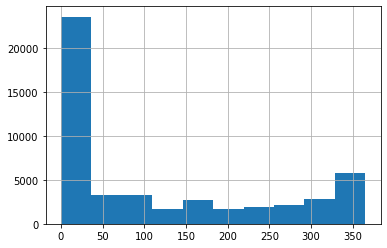

In [16]:
df['availability_365'].hist()

In [17]:
(df['availability_365'] == 0).sum() #365일중 총 0일 숙박 가능한곳의 숫자 -> 17000개나됨 -> 결측값들임

17533

In [18]:
df.isna().sum() #review가 있는 경우랑 없는경우로 나눠서 쓰기로 함

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [19]:
df.describe()
#host_id 값들의 차이가 많이 남
#price의 경우 min 이 0 max 10000 잘못 들어간 값으로 추정됨
#minimum_night : max가 1250인게 좀 이상함
#number of review : min이 0이다
#availability: max가 365인건 말이 되지만 min이 0인건 값이 입력 안됐다고 보여짐

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [20]:
(df['number_of_reviews']==0).sum() # 다른 review 데이터랑 겹치는듯

10052

In [21]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [24]:
df.drop(['id', 'name', 'host_name', 'latitude', 'longitude'], axis = 1, inplace = True)

In [26]:
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 문제 5. 수치형 데이터와 Price의 Jointplot 분석하기


In [27]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

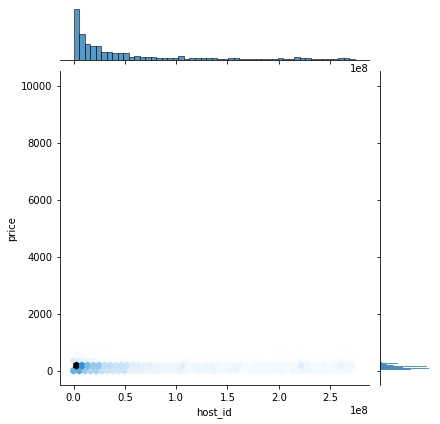

In [28]:
sns.jointplot(x='host_id', y = 'price',data =df, kind = 'hex') #상관성이 매우 적음! -> 수치형 데이터 클리닝후 다시 볼 필요가 있다 

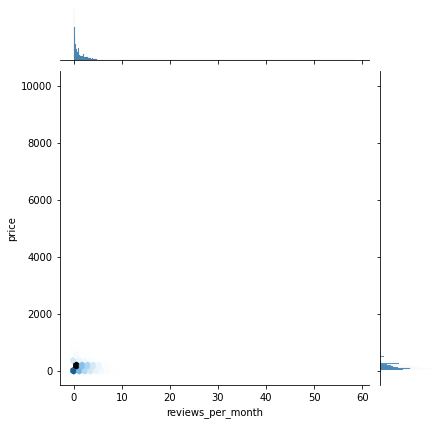

In [29]:
sns.jointplot(x='reviews_per_month', y = 'price',data =df, kind = 'hex') #이것도 아래에 몰려있음 -> price가 아웃라이어가 많기 때문일듯 -> 데이터 클리닝 해야할듯

### 문제 6. 수치형 데이터와 Price의 상관성 분석하기

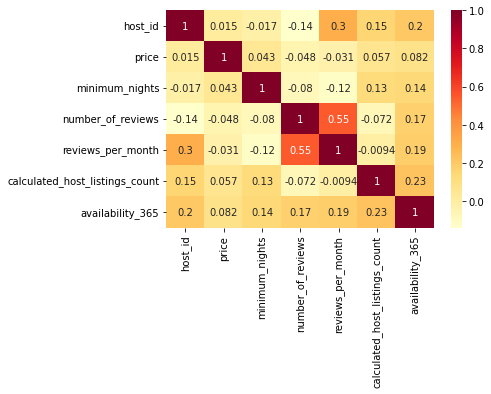

In [30]:
sns.heatmap(df.corr(),annot = True, cmap = 'YlOrRd')
#price와의 상관성이 모든 컬럼에서 매우 낮게 나타남

#host_id와 review per month의 상관성이 높음 -> 숫자가 높은 호스트 (최근호스트)일 수록 월별평이 많다는것
#그에 비해 number of reviews는 상관관계가 낮음 -> 숫자가 높은 호스트가 전체 리뷰수는 적을수 밖에 없기 때문
#host_id와 calculated_host_listing_count -> 상관성이 있는편 -> 나중에 들어온 호스트가 집을 더 가진 확률이 높다

### 문제 7. 범주형 데이터와 Price의 Boxplot 계열 및 Histogram 분석하기

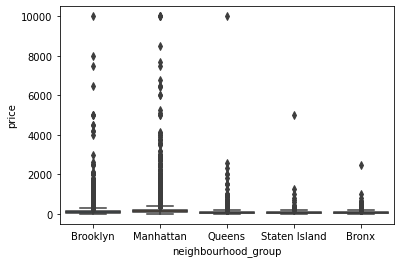

In [32]:
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = df) #아웃라이어가 많아 보기 힘듬

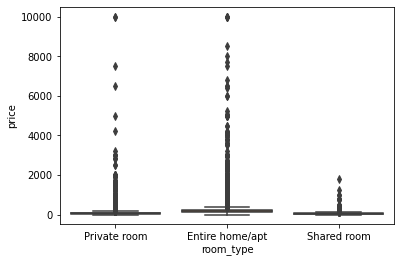

In [33]:
sns.boxplot(x = 'room_type', y = 'price', data = df) #마찬가지

## Step 3. 데이터 클리닝 수행하기

### 문제 8. 미기입, 오기입 데이터 확인하기

In [ ]:
# 각 컬럼을 분석하여 미기입/오기입된 데이터 확인하기
# Hint) 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts()등으로 확인






### 문제 9. 아웃라이어를 제거하고 통계 재분석하기

In [ ]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기






### 문제 10. 미기입 데이터 처리하기

In [ ]:
# fill(), dropna() 등으로 미기입된 데이터를 처리하기





## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리

In [ ]:
X_cat = 






### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = 
X_num = 

X = 
y = 

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_reg = 




### 문제 15. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = 





## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기






### 문제 17. 에러 값의 히스토그램 확인하기


In [ ]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = pred - y_test



